# Lab 6 Notebook: Advanced Least Squres Fitting - Half-Life
written by Marshall Campbell marshaac@uci.edu

This notebook will attempt to simulate Physics 52C Lab 6. Only edit cells where explicitly indicated.

## 6.3.2 Distance Dependence and inverse square law

**Goal: Measure the number of radioactive decay counts versus distance and establish the inverse square law for radioactive decay counts.**

In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
import scipy.optimize as optimization

Main function. Best not to edit any of the entries below.

In [54]:
def measure():
    global bg_counts
    global source_counts
    global source_error
    global bg_error
    basenum_bg = 80/60
    bg_error = np.random.normal(0,np.sqrt(timeinterval*basenum_bg))           ### Background Error ###
    bg_counts = timeinterval*(basenum_bg) + bg_error
    bg_counts = np.around(bg_counts)
    if bg_counts < 0:
        bg_counts = 0

    ### Measure Source ###
    basenum_source = 50000/60
    source_error = np.random.normal(0,np.sqrt(timeinterval*(basenum_source/(distance**2))))   ### Source Error ###
    source_counts = timeinterval*(basenum_source/(distance**2)) + source_error 
    source_counts = np.around(source_counts)
    if source_counts < 0:
        source_counts = 0
        
    print('Source + Background = {} counts'.format(source_counts + bg_counts))

**1. Measure the background and it's uncertainty over a 5 minute interval:**

In [55]:
### Meain Settings ###
distance = 30   # in centi-meters
timeinterval = 60*5 # in seconds

In [56]:
### Measure Background ###
basenum_bg = 80/60
bg_error = np.random.normal(0,np.sqrt(timeinterval*basenum_bg))
bg_counts = timeinterval*(basenum_bg) + bg_error
bg_counts = np.around(bg_counts)
if bg_counts < 0:
    bg_counts = 0
print('Background = {} counts'.format(bg_counts))

Background = 392.0 counts


Make a note of the background and its uncertainty below. Use these values to correct the total counts later.

Explain how you obtained or estimated the uncertainty on the background count.

**At 5 cm intervals between d = 10 and 30 cm, measure the number of counts during 5 minute periods.**

In [57]:
### Here adjust distance and rerun the cell. Repeat for d = 10cm-30cm in intervals of 5cm
distance = 10         
measure()

Source + Background = 2937.0 counts


**2. Make a table of 1/d^2, corrected count rate, uncertainty, and weight (refer to lab 4 to calculate uncertainty and chapter 8 to determine the weights)**

Feel free to enter a table (you can use handwritten paper and a photo inserted below, excel or other software, or make a python table. We show an example below)

Explain how the uncertainty in the corrected counts were obtained:

***For later plotting example we will enter values into a python table. Update the values in arrays of the block below to match your measurements.***

In [58]:
# enter d, corrected counts, uncertainty here:

d = np.array([10, 15, 20, 25, 30])

corrected_counts_withdistance = np.array([2400, 1200, 600, 400, 250]) 

uncertainty_withdistance = np.array([50,40,30,24,15])

# Best not to modify these two entries

dinverse2=1/d**2

weight = 1/uncertainty_withdistance**2

In [59]:
df = pd.DataFrame({'d':d,'1/d^2':dinverse2, 'Counts':corrected_counts_withdistance, 'Uncertainty':uncertainty_withdistance, 'Weights':weight})
df

,d,1/d^2,Counts,Uncertainty,Weights
0,10,0.010000,2400,50,0.000400
1,15,0.004444,1200,40,0.000625
2,20,0.002500,600,30,0.001111
3,25,0.001600,400,24,0.001736
4,30,0.001111,250,15,0.004444


**Graph the 1/d^2 vs corrected counts data, including error bars**

Feel free to draw a graph using any means available, including python.

We given a python based example for the data entered into the table above.

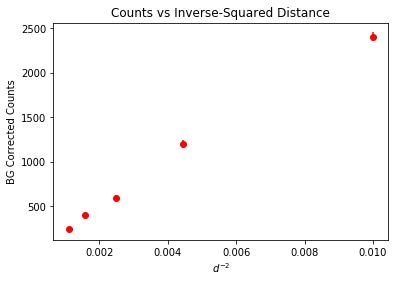

In [60]:
fig, ax = plt.subplots()

for i in range(len(d)):
    x=1/d**2
    y=corrected_counts_withdistance
    yerr=uncertainty_withdistance


ax.errorbar(x,y,xerr=0,yerr=yerr,fmt='ro')
ax.set_xlabel('$d^{-2}$')
ax.set_ylabel('BG Corrected Counts')
ax.set_title('Counts vs Inverse-Squared Distance')
plt.show()

**3. Calculate the weighted least-squares line fit to your data using Eqs. (8.37)-(8.39)**

This involves a line of the form y=A+B*x and determining A and B values keeping track of the weights that capture the uncertainties in y.

You can use a python code and other ways to estimate A, B and their uncertainties. Please enter those below.

**Draw the best fit line on your graph**

Update the graph you made in above with the best-fit line. And reenter a new graph here with line. You can use python or any other software to do this.

**We provide an example line fit and a graph with line to data using the built-in scipy tools.*** 

This is not a replacement for what is asked in the lab. Lab requires the use of
Taylor equations to determin the line fit A and B values.

We also print A, B values and their errors for reference

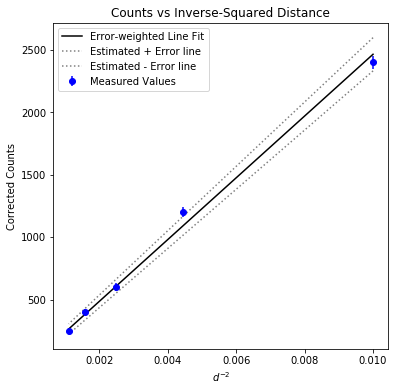

A and sigmaA: -11.461449012707469 29.78721348546827
B and sigmaB: 247663.33580340398 10324.853267322616


In [61]:
def func(x,a,b):
    return a + b*x

pfit, pcov = optimization.curve_fit(func, dinverse2, corrected_counts_withdistance, sigma=uncertainty_withdistance)
a = pfit[0]
b = pfit[1]
perr= np.sqrt(np.diag(pcov))
aerr = perr[0]
berr = perr[1]

x = np.linspace(dinverse2[0],dinverse2[4],1000)
y = a + b*x
yup = (a+aerr) + (b + berr)*x
ydown = (a-aerr) + (b - berr)*x
plt.figure(figsize=(6,6))
for i in range(len(d)):
    plt.errorbar(dinverse2[i],corrected_counts_withdistance[i],yerr=uncertainty_withdistance[i],fmt='o',color='blue')
    
plt.plot(x,y,color='black')
plt.plot(x,yup,color='gray',linestyle='dotted')
plt.plot(x,ydown,color='gray',linestyle='dotted')
plt.xlabel('$d^{-2}$')
plt.ylabel('Corrected Counts')
plt.title('Counts vs Inverse-Squared Distance')
info = ['Error-weighted Line Fit','Estimated + Error line','Estimated - Error line','Measured Values']
plt.legend(info)

plt.show()

print('A and sigmaA:',a,aerr)
print('B and sigmaB:',b,berr)

**4. Calculate the correlation coefficient r**

See Taylor Appendix C. Including the equation there to caculate correlation coefficient. 

In statistics note this correlation coefficieint is called the Pearson correlation coefficient.

**Enter r value here**

**5. Are your data consistent with isotropic decay following the inverse square-law?**

To answer this make use of the probability table in Taylor appendix C for N=5 data points and the r value obtained above. See Week 6 lecture notes if you missed that zoom lecture. 

You can find calculators online for this as well, for example:
https://www.socscistatistics.com/pvalues/pearsondistribution.aspx


***We produce an example calculation here also using built-in tools.***

Note that this is not a replacement for the Appendix C calculation. 

In [62]:
x=dinverse2
y=corrected_counts_withdistance
r,p=scipy.pearsonr(x,y)
print('built-in tools r',r)
print('built-in tools probability as a %',p*100)

built-in tools r 0.9976132644795133
built-in tools probability as a % 0.013992159891976105


## 6.3.3 Half-Life

**Goal: Measure the half-life of <sup>$137m$</sup>$Ba$**

The following cell redefines measure( ) with our new fast decaying source. Best not to edit any of the entries below.

Measurements will be at 6 second intervals, unlike previous at 5 mins.

In [65]:
def measure_halflife():
    global bg_counts
    global source_counts
    global source_error
    global bg_error
    basenum_bg = 80/60
    bg_error = np.random.normal(0,np.sqrt(timeinterval*basenum_bg))           ### Background Error ###
    bg_counts = timeinterval*(basenum_bg) + bg_error
    bg_counts = np.around(bg_counts)
    if bg_counts < 0:
        bg_counts = 0

    ### Measure Source ###
    basenum_source = 50000/60
    beta = -np.log(1/2)/(60*2.6)
    source_error = np.random.normal(0,np.sqrt(timeinterval*(basenum_source/(distance**2))))   ### Source Error ###
    source_counts = timeinterval*(basenum_source/(distance**2))*np.exp(-beta*time) + source_error 
    source_counts = np.around(source_counts)
    if source_counts < 0:
        source_counts = 0
        
    print('Source + Background = {} counts'.format(source_counts + bg_counts))

**First Measure the background and it's uncertainty over a 6 second interval:**

In [66]:
### Meain Settings ###
distance = 1 #you can keep distance fixed here to 1 cm, no need to change this **
timeinterval = 6 # in seconds

In [87]:
### Measure Background ###
basenum_bg = 80/60
bg_error = np.random.normal(0,np.sqrt(timeinterval*basenum_bg))
bg_counts = timeinterval*(basenum_bg) + bg_error
bg_counts = np.around(bg_counts)

if bg_counts < 0:
    bg_counts = 0
print('Background = {} counts'.format(bg_counts))

Background = 7.0 counts


Make a note of the background and its uncertainty below. Use these values to correct the total counts later.

In [88]:
def restart():
    global time
    time = 0
def wait():
    global time
    time = time + 60
restart()

The wait function (defined above) acts as if you waited 60 seconds. After running wait, if you run measure, you will measure counts as if you waited 1 minute.

Count for 6 seconds once each minute for ten minutes. i.e. run measure, record counts, run wait, then run measure and record counts again. Record number of counts everytime you run measure. Repeat until you have 11 total measurements. Record as a list and transfer to notebook below. If you think you messed up, run restart to start over.

In [93]:
measure_halflife()

Source + Background = 3032.0 counts


In [94]:
wait()

***Only run this if you think you made a mistake in above when taking data 11 times. This resets the counting clock to beginning of the experiment.***

In [19]:
restart()

**1. Now make a table of background corrected counts data, including uncertainities**

Insert a table below of the data collected (if you made one by hand or other software like excel upload an image or  feel free to make a table using python - we give an example below)

Explain below how you determined the uncertainty on the background corrected counts

***For use later we produce a python table***

In [95]:
times = np.array([i*60 for i in range(11)])     ## This is just [0,60,120,180,...] no need to edit this ##

# enter your background corrected counts values here, replacing these dummy entries 

corrected_counts = np.array([4933, 3788, 2991, 2326, 1828, 1264, 910, 859, 612, 548, 306])

# enter your background corrected count uncertainty values here, replacing these dummy entries 

uncertainty  = np.array([5,5,5,5,5,5,5,5,5,5,5]) 

# these are for use later, best not to edit

logcounts=np.log(corrected_counts)
logerror = uncertainty/corrected_counts

Check the table of values

In [96]:
df = pd.DataFrame({'time':times,'Counts':corrected_counts, 'Uncertainty':uncertainty, 'Log Counts':logcounts,'Log count error':logerror})
df

,time,Counts,Uncertainty,Log Counts,Log count error
0,0,4933,5,8.503703,0.001014
1,60,3788,5,8.239593,0.001320
2,120,2991,5,8.003363,0.001672
3,180,2326,5,7.751905,0.002150
4,240,1828,5,7.510978,0.002735
5,300,1264,5,7.142037,0.003956
6,360,910,5,6.813445,0.005495
7,420,859,5,6.755769,0.005821
8,480,612,5,6.416732,0.008170
9,540,548,5,6.306275,0.009124


**3. Plot the data on a semilog plot. Including error bars.**

Make a plot using python or other software and enter below. Plot should be time on x axis and ln(counts) on
y axis. Use propagation of errors to get uncertainty on log(counts)

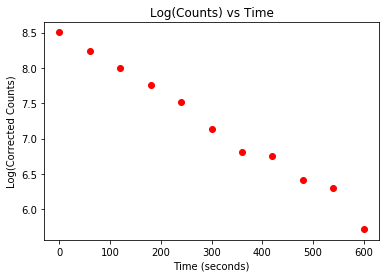

In [97]:
fig, ax = plt.subplots()

for i in range(len(times)):
    x=times
    y=np.log(corrected_counts)
    yerr=uncertainty/np.exp(y)


ax.errorbar(x,y,xerr=0,yerr=yerr,fmt='ro')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Log(Corrected Counts)')
ax.set_title('Log(Counts) vs Time')
plt.show()

**3. Calculate the least-squares fit to the data (For simplicity, you may neglect the variable weights if you wish - the counts are such that y uncertainty is usually small).**

You can use a python code and other ways to estimate A, B and their uncertainties. Please enter those below.

**Draw the fit on the graph.**

Update the graph you made in above with the best-fit line. And reenter a new graph here with line. You can use python or any other software to do this.

***We provide an example line fit and a graph with line to data using the built-in scipy tools.*** 

This is not a replacement for what is asked in the lab. Lab requires the use of
Taylor equations to determin the line fit A and B values.

We also print A, B values and their errors for reference

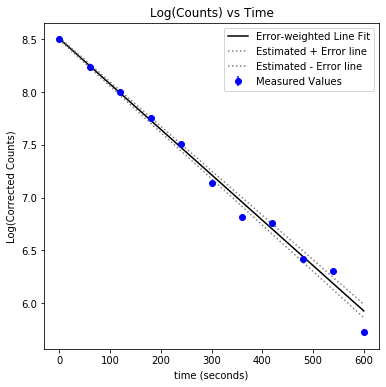

A and sigmaA: 8.505762994268178 0.011867171662064814
B and sigmaB: -0.004299972249137556 8.642827387359253e-05


In [98]:
def func(x,a,b):
    return a + b*x

pfit, pcov = optimization.curve_fit(func, times, logcounts, sigma=logerror)
a = pfit[0]
b = pfit[1]
perr= np.sqrt(np.diag(pcov))
aerr = perr[0]
berr = perr[1]

x = np.linspace(times[0],times[10],1000)
y = a + b*x
yup = (a+aerr) + (b + berr)*x
ydown = (a-aerr) + (b - berr)*x
plt.figure(figsize=(6,6))
for i in range(len(times)):
    plt.errorbar(times[i],logcounts[i],yerr=logerror[i],fmt='o',color='blue')
    
plt.plot(x,y,color='black')
plt.plot(x,yup,color='gray',linestyle='dotted')
plt.plot(x,ydown,color='gray',linestyle='dotted')
plt.xlabel('time (seconds)')
plt.ylabel('Log(Corrected Counts)')
plt.title('Log(Counts) vs Time')
info = ['Error-weighted Line Fit','Estimated + Error line','Estimated - Error line','Measured Values']
plt.legend(info)

plt.show()

print('A and sigmaA:',a,aerr)
print('B and sigmaB:',b,berr)

**4. From the fit coefficient B, calculate the half-life of <sup>$137m$</sup>$Ba$, including uncertainty.**


The accpeted half life is 2.6 minutes. Compare your measurement to the accepted value.

Enter your half-life value, its uncertainty, and comparison to 2.6 minutes below

For the example scipy fit we did above the calcualtion is as follows:

In [99]:
halflife = (np.log(1/2)/b)/60
halflife_uncertainty = np.abs(-berr*np.log(1/2)/b**2)
print('Measured Half-Life: {} minutes'.format(halflife))
print('Uncertainty in Half-Life: {} seconds'.format(halflife_uncertainty))

Measured Half-Life: 2.6866343176166994 minutes
Uncertainty in Half-Life: 3.240037188348008 seconds


## 6.4 Reflection Questions

1. The three main safety principles for handling radioactive sources are:

a. minimize duration of the exposure

b. maximize the distance from the source

c. maximize the amount of shielding

For these three a to c, describe which experiments or which parts of the experiments completed so far demonstrate their  application.

2. In the statistical test for inverse-square law we plotted data in terms of $d^{-2}$. Explain how the statistical significance determined may fail if we had used $d$ itself.

3. What assumptions about the weights are made in an ordinary least squares fit? In words explain why it makes more sense to use measured weights in a least squares fit.

## 6.5 Extra credit analysis

This analysis is optional but worth 10 extra points.

You can use python (will need to write a small amount of code) or this can be done with excel or any other computer software or program that allows plotting (or even a graphing calculator).
You are welcome to use any plotting software i.e. excel, mathematica, python, to do so.  Insert an image of your graph below or upload a separate image to Canvas.

If you are using Python feel free to use the example code above we have given for a comparison model fit.

1. We expect the decay to fall off as 1/d$^{2}$ but we haven’t tested other models. 

Plot your distance dependence data for count rate vs. 1/d, 1/d$^{2}$, & 1/d$^{3}$ and 
compute the respective correlation coefficients. 

Which dependence gives the largest correlation coefficient? 


2. Suppose you wanted to determine if the 1/d$^{2}$ dependence is
consistent with your data from Section 6.3.2, instead of the null hypothesis we have made that ${-2}$ dependence is correct (i.e., inverse-square law). 

For example, we have not discriminated between 1/d$^{2}$ and say 1/d$^{2.1}$. 

We can test for this dependence using the data and by measuring directly the coefficient $\alpha$ in which
$1/d^{2+\alpha}$.

Using any analysis technique, perform a model estimate to obtain the best-fit value of $\alpha$ given the data
obtained in Section 6.3.2. Explain how you obtained the $\alpha$ value and its error.

For this analysis you may want to consider a model fit to the counts $N$ of the form
$N=N_0/d^{2+\alpha}$ and constrain both the normalization $N_0$ and $\alpha$ as two parameters. 
The fit will likely not be a linear model fit but one can easily minimize $\chi^2$ to constrain $N_0$ and $\alpha$.

What is the best-fit value of $\alpha$ allowed by the data and its uncertainty?

Describe your attempt and details, including any codes/plots below.